<a href="https://colab.research.google.com/github/tonykennedy1970/hello_world/blob/main/Practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Programming assignment 1: introductory tour and decision trees
In this assignment, you will take a quick guided tour of the scikit-learn library, one of the most widely used machine learning libraries in Python. We will particularly focus on decision tree learning for classification and regression.


There are three tasks of the assignment, where the main focus is on using scikit-learn for training and evaluating machine learning models. 

Save this notebook in your own google drive/github account, complete your code, plots, and comments and save as a .ipynb file. Name the file as "Assignment1_your_name.ipynb" and submit to the assignmet for this practical on blackboard.

Deadline: 06-11-2020

Didactic purpose of this assignment:

*   getting a feel for the workflow of machine learning in Python;
*   understanding machine learning algorithms for classification and regression;




# Task 1: A classification example: fetal heart condition diagnosis
The UCI Machine Learning Repository contains several datasets that can be used to investigate different machine learning algorithms. In this exercise, we'll use a dataset of fetal heart diagnosis. The dataset contains measurements from about 2,600 fetuses. This is a classification task, where our task is to predict a diagnosis type following the FIGO Intrapartum Fetal Monitoring Guidelines: normal, suspicious, or pathological.

# Step 1. Reading the data

This file contains the data that we will use. This file contains the same data as in the public distribution, except that we converted from Excel to CSV. Download the file and save it in a working directory.

Open your favorite editor or a Jupyter notebook. To read the CSV file, it is probably easiest to use the Pandas library. Here is a code snippet that carries out the relevant steps:


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

  
# Read the CSV file.
data = pd.read_csv("https://raw.githubusercontent.com/niallomahony93/MLDIoT_Practical1/master/Assignment1/CTG.csv", skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)


# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

Y.head()
X.head()
data.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,4.0,0.0,4.0,2.0,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,2.0,0.0,5.0,2.0,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,2.0,0.0,6.0,2.0,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,4.0,0.0,5.0,0.0,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# Step 2. Training the baseline classifier

We can now start to investigate different classifiers.
The DummyClassifier is a simple classifier that does not make use of the features: it just returns the most common label in the training set, in this case Spondylolisthesis. The purpose of using such a stupid classifier is as a baseline: a simple classifier that we can try before we move on to more complex classifiers.

In [22]:

from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent')


To get an idea of how well our simple classifier works, we carry out a cross-validation over the training set and compute the classification accuracy on each fold.

In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, Xtrain, Ytrain)

array([0.78235294, 0.78235294, 0.77941176, 0.77941176, 0.77941176])

The result is a NumPy array that contains the accuracies on the different folds in the cross-validation. Get the mean accuracy with the .mean() method.

In [10]:
cross_val_score(clf, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

0.7805882352941176

## Step 3. Trying out some different classifiers
Replace the DummyClassifier with some more meaningful classifier and run the cross-validation again. Try out a few classifiers and see how much you can improve the cross-validation accuracy. Remember, the accuracy is defined as the proportion of correctly classified instances, and we want this value to be high.


Here are some possible options:

Tree-based classifiers:

sklearn.tree.DecisionTreeClassifier

sklearn.ensemble.RandomForestClassifier

sklearn.ensemble.GradientBoostingClassifier


Linear classifiers:

sklearn.linear_model.Perceptron

sklearn.linear_model.LogisticRegression

sklearn.svm.LinearSVC


Neural network classifier (will take longer time to train):

sklearn.neural_network.MLPClassifier

You may also try to tune the hyperparameters of the various classifiers to improve the performance. For instance, the decision tree classifier has a parameter that sets the maximum depth, and in the neural network classifier you can control the number of layers and the number of neurons in each layer.

# The Tree-based classifier using DecisionTreeClassifier 

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
from sklearn.model_selection import cross_val_score

cross_val_score(clf, Xtrain, Ytrain)
cross_val_score(clf, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

0.924705882352941

# The Tree-based classifier using RandomForestClassifier 

In [ ]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier()
from sklearn.model_selection import cross_val_score
cross_val_score(clf, Xtrain, Ytrain)
cross_val_score(clf, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

0.9405882352941177

# The Tree-based classifier using GradientBoostingClassifier

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()
from sklearn.model_selection import cross_val_score
cross_val_score(clf, Xtrain, Ytrain)
cross_val_score(clf, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

0.9494117647058824

# Linear classifier using Perceptron

In [ ]:
from sklearn import linear_model
clf = linear_model.Perceptron()
from sklearn.model_selection import cross_val_score
cross_val_score(clf, Xtrain, Ytrain)
cross_val_score(clf, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

0.825294117647059

# Linear classifier using LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lclr = LogisticRegression(solver= 'newton-cg',max_iter=5000)
lclr=lclr.fit(Xtrain,Ytrain)
cross_val_score(lclr, Xtrain, Ytrain)
cross_val_score(lclr, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

0.8905882352941177

# Linear classifier using LinearSVC

In [ ]:
from sklearn.svm import LinearSVC
slSVC = LinearSVC(max_iter=20000)
from sklearn.model_selection import cross_val_score
cross_val_score(slSVC, Xtrain, Ytrain)
cross_val_score(slSVC, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.8094117647058823

# Linear classifier using MLPClassifier

In [23]:
from sklearn.neural_network import MLPClassifier
cmlp = MLPClassifier(max_iter=20000)
from sklearn.model_selection import cross_val_score
cross_val_score(cmlp, Xtrain, Ytrain)
cross_val_score(cmlp, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()



0.8829411764705881

# Step 4. Final evaluation
When you have found a classifier that gives a high accuracy in the cross-validation evaluation, train it on the whole training set and evaluate it on the held-out test set. Please include a description of the classifier you selected and report its accuracy below.

According to step 3, the best results were made using **GRADIENT BOOSTING** and the accuracy is about **0.9488**.

In [24]:
from sklearn import ensemble
cgbc = ensemble.GradientBoostingClassifier()
from sklearn.model_selection import cross_val_score
cross_val_score(cgbc, Xtrain, Ytrain)
cross_val_score(cgbc, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

0.9488235294117647

# Task 2: Decision trees for classification
Import the code from Lecture1.ipynb and use the defined class TreeClassifier as your classifier in an experiment similar to those in Task 1. Tune the hyperparameter max_depth to get the best cross-validation performance, and then evaluate the classifier on the test set.

Please report below what value of max_depth you selected and what accuracy you got.

For illustration, let's also draw a tree. Set max_depth to a reasonable small value, and then call draw_tree to visualize the learned decision tree. Include this tree in your report.

The accuracy of the classifier in the test set is ____. The accuracy is largely increased at the max_depth _______. The learned decision tree is visualized:

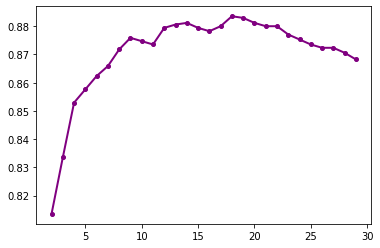

In [25]:
import numpy as np
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        graph.node(node_id, str(self.value), style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id

from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth

    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be 
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        XY = sorted(zip(X[:, feature], Y))

        n = len(XY)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = XY[i][0]
            y_i = XY[i][1]

            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            x_next = XY[i+1][0]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(XY[max_i][0] + XY[max_i+1][0])
        return score, feature, split_point

def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

import matplotlib.pyplot as plt
score=[]
N=[]
for i in range(2,30):
    tc=TreeClassifier(max_depth=i)  
    tc.fit(Xtrain, Ytrain)
    score.append(cross_val_score(tc, Xtrain, Ytrain, cv=5, scoring='accuracy').mean())
    N.append(i)
plt.plot(N,score,color='purple',marker='o', markerfacecolor='purple', markersize=4, linewidth=2)

In [26]:
tc=TreeClassifier(max_depth=17)  
tc.fit(Xtrain, Ytrain)
Yguess = tc.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

NameError: ignored

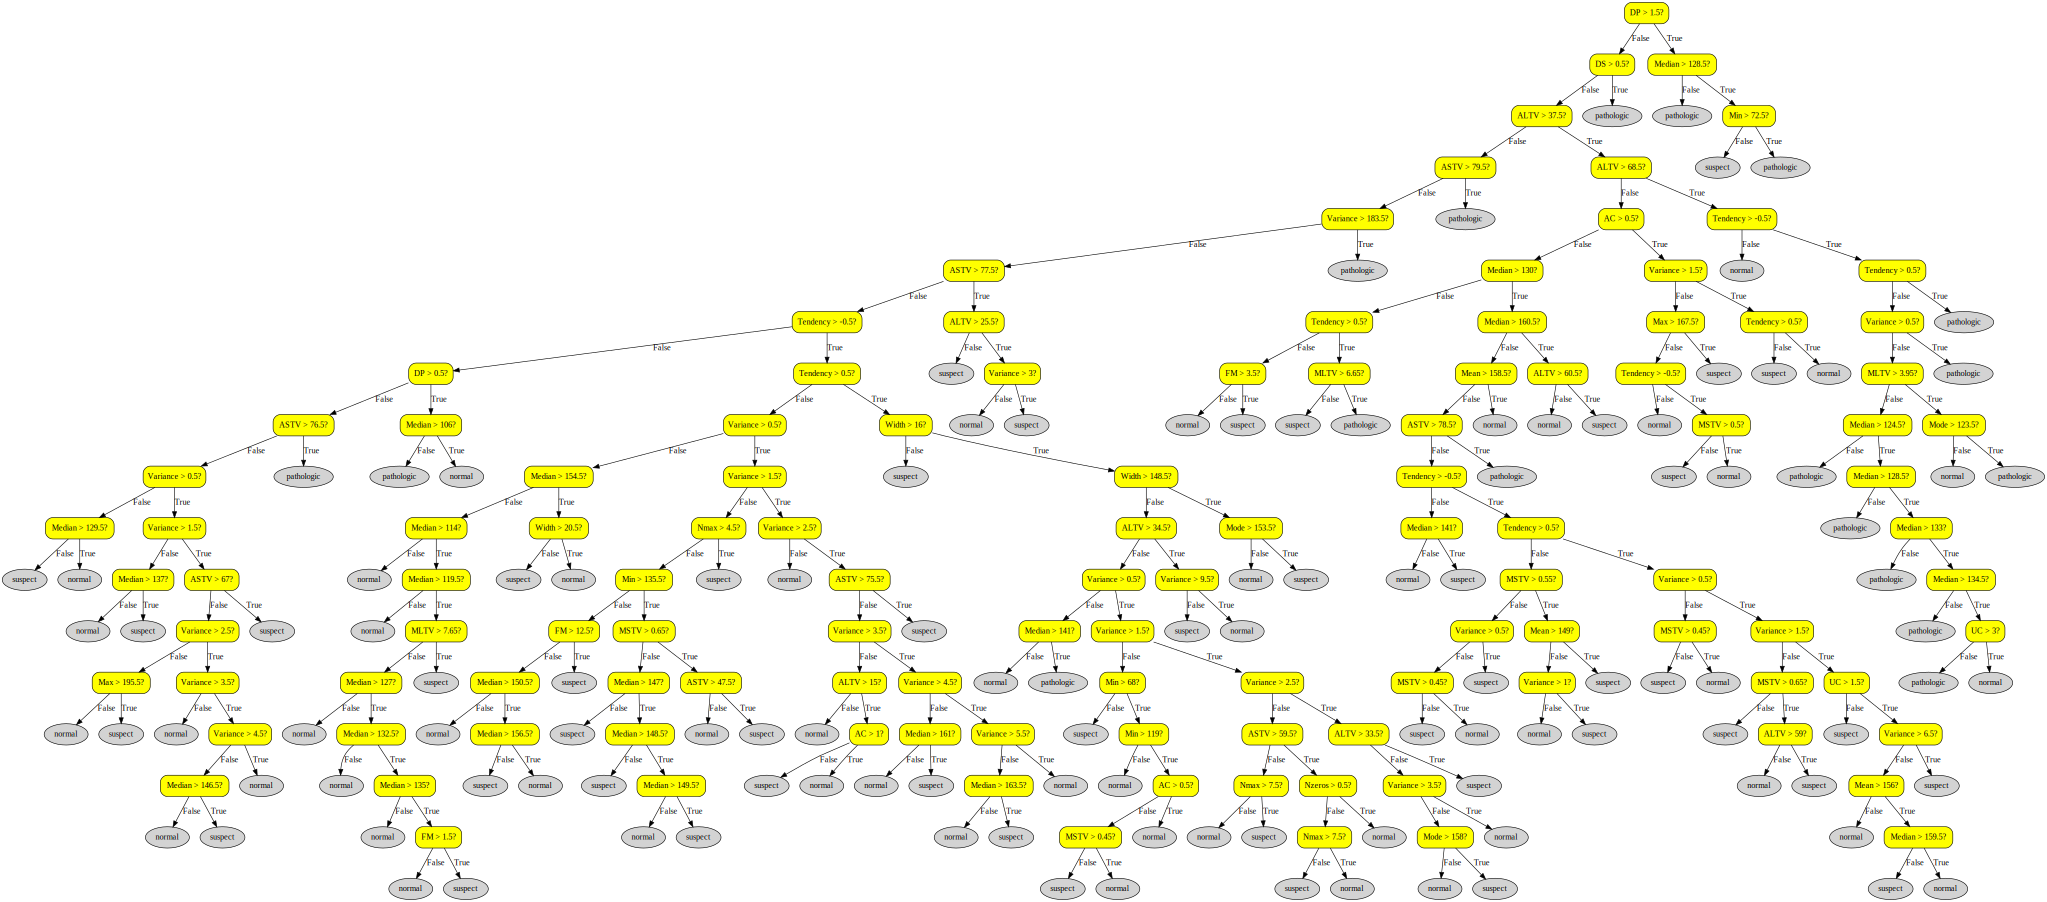

In [27]:
tc=TreeClassifier(max_depth=17)  
tc.fit(Xtrain, Ytrain)
tc.draw_tree()

# Task 3: A regression example: predicting apartment prices
Here is another dataset. This dataset was created by Sberbank and contains some statistics from the Russian real estate market. Here is the Kaggle page where you can find the original data.

Since we will just be able to handle numerical features and not symbolic ones, we'll need with a simplified version of the dataset. So we'll just select 9 of the columns in the dataset. The goal is to predict the price of an apartment, given numerical information such as the number of rooms, the size of the apartment in square meters, the floor, etc. Our approach will be similar to what we did in the classification example: load the data, find a suitable model using cross-validation over the training set, and finally evaluate on the held-out test data.

The following code snippet will carry out the basic reading and preprocessing of the data.

In [ ]:
from sklearn import preprocessing
from sklearn import utils
# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)
# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)
Y.head(100)

We train a baseline dummy regressor (which always predicts the same value) and evaluate it in a cross-validation setting.

This example looks quite similar to the classification example above. The main differences are (a) that we are predicting numerical values, not symbolic values; (b) that we are evaluating using the mean squared error metric, not the accuracy metric that we used to evaluate the classifiers.

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain.astype('int'), scoring='neg_mean_squared_error')

Replace the dummy regressor with something more meaningful and iterate until you cannot improve the performance. Please note that the cross_validate function returns the negative mean squared error.

Some possible regression models that you can try:

sklearn.linear_model.LinearRegression

sklearn.linear_model.Ridge

sklearn.linear_model.Lasso

sklearn.tree.DecisionTreeRegressor

sklearn.ensemble.RandomForestRegressor

sklearn.ensemble.GradientBoostingRegressor

sklearn.neural_network.MLPRegressor

According to the negative mean squared error, the best results were made using ______ and the error is about ____. 

Finally, train on the full training set and evaluate on the held-out test set:

In [ ]:
from sklearn.metrics import mean_squared_error
  
regr.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, regr.predict(Xtest))

the mean squared error is _____.